In [1]:
input_path = r"../data/input/shopping_behavior_updated.csv"

In [2]:
import pandas as pd

df = pd.read_csv(input_path)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
age_brackets = {f"{i}_{i+4}": i+4 for i in range(0, 100, 5)}
print(age_brackets)

{'0_4': 4, '5_9': 9, '10_14': 14, '15_19': 19, '20_24': 24, '25_29': 29, '30_34': 34, '35_39': 39, '40_44': 44, '45_49': 49, '50_54': 54, '55_59': 59, '60_64': 64, '65_69': 69, '70_74': 74, '75_79': 79, '80_84': 84, '85_89': 89, '90_94': 94, '95_99': 99}


In [4]:
results = []
for age_key in age_brackets:
    lower, upper = map(int, age_key.split('_'))
    mask = (df['Age'] >= lower) & (df['Age'] < upper)
    
    male_mask = mask & (df['Gender'] == 'Male')
    female_mask = mask & (df['Gender'] == 'Female')
    
    male_count = male_mask.sum()
    female_count = female_mask.sum()
    male_avg_purchase = df.loc[male_mask, 'Purchase Amount (USD)'].mean() if male_count > 0 else 0
    female_avg_purchase = df.loc[female_mask, 'Purchase Amount (USD)'].mean() if female_count > 0 else 0
    
    results.append({
        'age': age_key, 
        'male': male_count, 
        'female': female_count,
        'male_avg_purchase': male_avg_purchase,
        'female_avg_purchase': female_avg_purchase
    })

pyramid_df = pd.DataFrame(results)
pyramid_df

,age,male,female,male_avg_purchase,female_avg_purchase
0,0_4,0,0,0.000000,0.000000
1,5_9,0,0,0.000000,0.000000
2,10_14,0,0,0.000000,0.000000
3,15_19,49,20,60.102041,59.700000
4,20_24,184,84,59.559783,58.666667
5,25_29,216,100,59.092593,63.840000
6,30_34,199,96,60.552764,61.916667
7,35_39,203,90,61.014778,59.388889
8,40_44,224,93,57.508929,58.935484
9,45_49,172,115,56.895349,54.017391


In [5]:
pyramid_df['male'] = pyramid_df['male'] / -1
pyramid_df['female'] = pyramid_df['female'] / 1

In [6]:
ages = list(age_brackets.keys())

/tmp/ipykernel_77748/1534952723.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


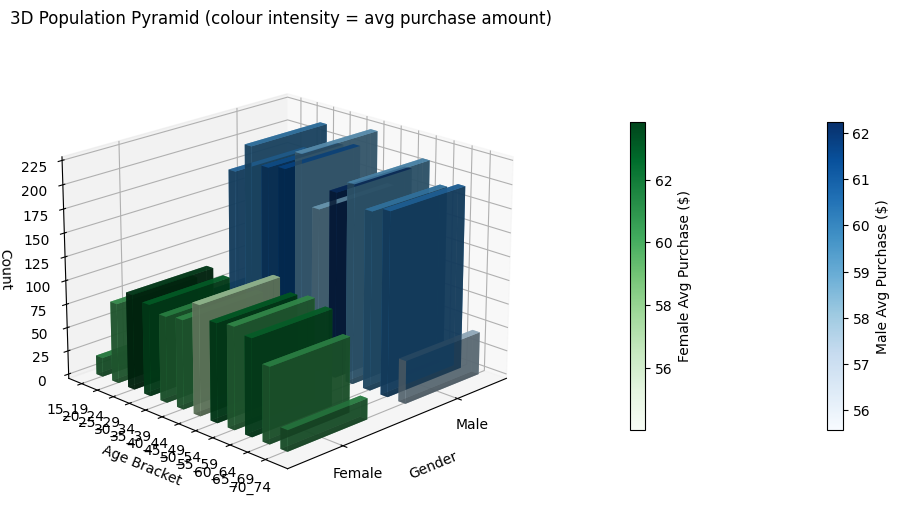

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

valid_mask = (pyramid_df['male'] != 0) | (pyramid_df['female'] != 0) # remove the 0's
valid_df = pyramid_df[valid_mask].reset_index(drop=True)
valid_ages = valid_df['age'].tolist()

# normalise avg purchase for colour mapping
male_norm = (valid_df['male_avg_purchase'] - valid_df['male_avg_purchase'].min()) / \
            (valid_df['male_avg_purchase'].max() - valid_df['male_avg_purchase'].min() + 1e-10)
female_norm = (valid_df['female_avg_purchase'] - valid_df['female_avg_purchase'].min()) / \
              (valid_df['female_avg_purchase'].max() - valid_df['female_avg_purchase'].min() + 1e-10)

male_colours = cm.Blues(0.3 + male_norm * 0.7)
female_colours = cm.Greens(0.3 + female_norm * 0.7)

y_pos = np.arange(len(valid_ages))

bar_width = 0.8
bar_depth = 0.4

ax.bar3d(np.zeros(len(y_pos)), y_pos, np.zeros(len(y_pos)), 
         bar_width, bar_depth, np.abs(valid_df['male'].values),
         color=male_colours, alpha=0.8)

ax.bar3d(np.ones(len(y_pos)) * 1.2, y_pos, np.zeros(len(y_pos)),
         bar_width, bar_depth, valid_df['female'].values,
         color=female_colours, alpha=0.8)

ax.set_xlabel('Gender')
ax.set_ylabel('Age Bracket')
ax.set_zlabel('Count')
ax.set_xticks([0.4, 1.6])
ax.set_xticklabels(['Male', 'Female'])
ax.set_yticks(y_pos)
ax.set_yticklabels(valid_ages)
ax.set_title('pop pyramid')

ax.view_init(elev=20, azim=45)

# add colourbars
sm_male = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(
    valid_df['male_avg_purchase'].min(), valid_df['male_avg_purchase'].max()))
sm_female = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(
    valid_df['female_avg_purchase'].min(), valid_df['female_avg_purchase'].max()))

cbar_male = fig.colorbar(sm_male, ax=ax, shrink=0.5, pad=0.1)
cbar_male.set_label('Male Avg Purchase ($)')
cbar_female = fig.colorbar(sm_female, ax=ax, shrink=0.5, pad=0.15)
cbar_female.set_label('Female Avg Purchase ($)')

plt.tight_layout()